In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models, optimizers

import os
import datetime
import zipfile

# Confirm versions
print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)

# Check GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Physical GPUs:", gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
logical_gpus = tf.config.list_logical_devices('GPU')
print("Logical GPUs:", logical_gpus)

# For reproducibility
tf.random.set_seed(42)


c:\Users\worki\anaconda3\envs\TF3070\lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


TensorFlow Version: 2.10.0
TensorFlow Hub Version: 0.16.1
Physical GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Logical GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")

def plot_history(history):
    """
    Plots training and validation accuracy and loss curves from a Keras History object.
    """
    acc = history.history.get("accuracy")
    val_acc = history.history.get("val_accuracy")
    loss = history.history.get("loss")
    val_loss = history.history.get("val_loss")
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label="Training Loss")
    plt.plot(epochs, val_loss, 'r', label="Validation Loss")
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [3]:
import zipfile

data_paths = "data/10_food_classes_10_percent.zip"
output_path = "data/10_food_classes_10_percent"

# Unzip the data
zip_ref = zipfile.ZipFile(data_paths)
zip_ref.extractall(output_path)
zip_ref.close()


In [4]:
import os

for dirpath, dirnames, filenames in os.walk("data/10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in data/10_food_classes_10_percent
There are 2 directories and 0 images in data/10_food_classes_10_percent\10_food_classes_10_percent
There are 10 directories and 0 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\chicken_curry
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\chicken_wings
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\fried_rice
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\grilled_salmon
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\hamburger
There are 0 directories and 250 images in data/10_food_classes_10_percent\10_food_classes_10_percent\test\ice_cream
There are 0 di

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

TRAIN_DIR  = "data/10_food_classes_10_percent/10_food_classes_10_percent/train"
TEST_DIR   = "data/10_food_classes_10_percent/10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)


train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_data.num_classes


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [6]:
def create_tensorboard_callback(base_dir, experiment_name):
    timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join(base_dir, experiment_name, timestamp)
    print(f"[INFO] Saving TensorBoard logs to: {log_dir}")
    return TensorBoard(log_dir=log_dir)


## TensorFlow Hub

### What is TensorFlow Hub?

**TensorFlow Hub**: A repository of trained machine learning models ready to be applied and fine-tuned for your own problems.

**Key Concept**: Using a pre-trained model is as simple as calling a URL.

### TensorFlow Hub Website Features

#### Navigation by Problem Domain
- **Images**: Image classification, object detection, style transfer, etc.
- **Text**: Natural language processing, text classification, etc.
- **Audio**: Audio classification, speech recognition, etc.
- **Video**: Video analysis, action recognition, etc.

#### Model Architecture Categories
- **EfficientNet**: State-of-the-art image classification (EfficientNet-B0 to B7)
- **ResNet**: Deep residual networks (ResNet-50, ResNet-152, etc.)
- **MobileNet**: Lightweight models for mobile devices
- **And many more...**

### Finding the Right Model

#### Research Resources
1. **Papers with Code**: Website collecting latest research papers and their code
2. **ImageNet Benchmarks**: Standard dataset for comparing computer vision models
3. **State-of-the-Art Rankings**: Shows which architectures perform best

#### Model Selection Criteria
- **Performance**: Check Papers with Code for current best performers
- **Problem Domain**: Match model training data to your problem
- **Model Size**: Consider computational requirements
- **Availability**: Check if model exists on TensorFlow Hub



In [7]:
efficientnet_url="https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

resnet_50_v2_url="https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"


In [8]:
def build_transfer_model(
    hub_url: str,
    num_classes: int,
    input_shape: tuple = (224, 224, 3),
    trainable: bool = False,
    dropout_rate: float = 0.2
) -> tf.keras.Model:
    """
    Build a transfer learning model using a TensorFlow Hub feature vector.

    Parameters:
        hub_url (str): URL to the TensorFlow Hub feature extractor.
        num_classes (int): Number of output classes.
        input_shape (tuple): Input shape of images.
        trainable (bool): Whether to fine-tune the feature extractor.
    Returns:
        tf.keras.Model: A compiled Keras model.
    """
    # Feature extractor from TF Hub
    feature_extractor = hub.KerasLayer(
        hub_url,
        input_shape=input_shape,
        trainable=trainable,
        name="feature_extractor_layer"
    )

    # Build model
    model = models.Sequential([
        feature_extractor,
        layers.Dense(num_classes, activation='softmax', name="output")
    ])

    return model



In [9]:
resnet_model = build_transfer_model(resnet_50_v2_url, num_classes=num_classes)

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 2048)             23564800  
 rasLayer)                                                       
                                                                 
 output (Dense)              (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [11]:
resnet_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

resnet_model_history=resnet_model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[create_tensorboard_callback(base_dir="tensorflow_hub",
                                           experiment_name="resnet50v2")]
)

[INFO] Saving TensorBoard logs to: tensorflow_hub\resnet50v2\20250709-000014
Epoch 1/10
24/24 [==============================] - 38s 1s/step - loss: 1.9002 - accuracy: 0.3773 - val_loss: 1.1492 - val_accuracy: 0.6472
Epoch 2/10
24/24 [==============================] - 6s 274ms/step - loss: 0.8718 - accuracy: 0.7280 - val_loss: 0.8328 - val_accuracy: 0.7432
Epoch 3/10
24/24 [==============================] - 6s 272ms/step - loss: 0.5994 - accuracy: 0.8387 - val_loss: 0.7341 - val_accuracy: 0.7700
Epoch 4/10
24/24 [==============================] - 6s 275ms/step - loss: 0.4577 - accuracy: 0.8853 - val_loss: 0.6958 - val_accuracy: 0.7832
Epoch 5/10
24/24 [==============================] - 7s 287ms/step - loss: 0.3675 - accuracy: 0.9200 - val_loss: 0.6696 - val_accuracy: 0.7828
Epoch 6/10
24/24 [==============================] - 7s 299ms/step - loss: 0.3085 - accuracy: 0.9373 - val_loss: 0.6659 - val_accuracy: 0.7820
Epoch 7/10
24/24 [==============================] - 7s 316ms/step - loss:

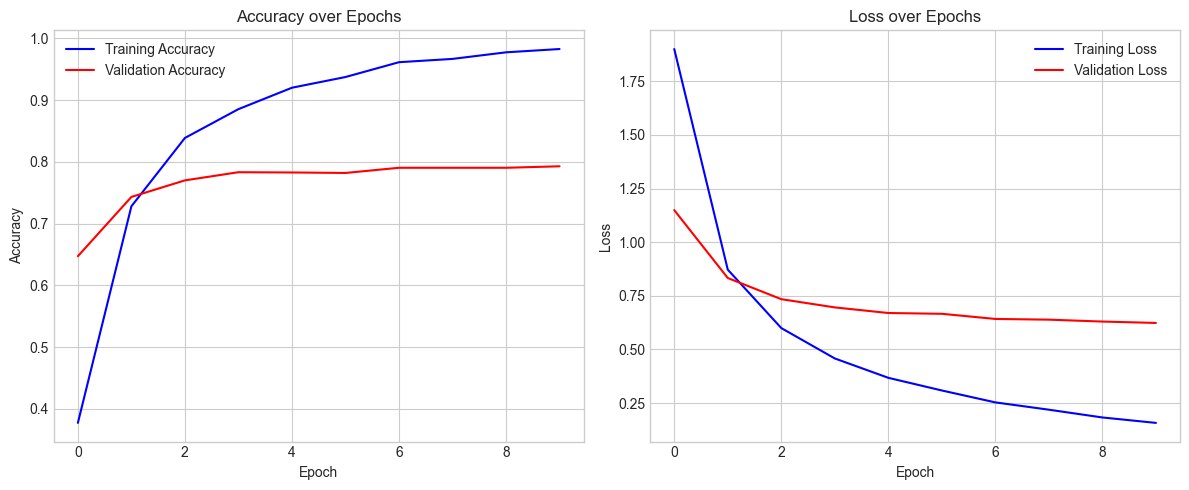

In [12]:
plot_history(resnet_model_history)

In [13]:
efficientnet_model = build_transfer_model(efficientnet_url, num_classes=num_classes)

In [14]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (Ke  (None, 1280)             4049564   
 rasLayer)                                                       
                                                                 
 output (Dense)              (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [15]:
efficientnet_model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

efficientnet_model_history=efficientnet_model.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[create_tensorboard_callback(base_dir="tensorflow_hub",
                                           experiment_name="efficientnet_B0")]
)

[INFO] Saving TensorBoard logs to: tensorflow_hub\efficientnet_B0\20250709-000203
Epoch 1/10
24/24 [==============================] - 20s 449ms/step - loss: 1.8084 - accuracy: 0.4507 - val_loss: 1.2717 - val_accuracy: 0.7296
Epoch 2/10
24/24 [==============================] - 7s 321ms/step - loss: 1.0333 - accuracy: 0.7787 - val_loss: 0.8503 - val_accuracy: 0.8280
Epoch 3/10
24/24 [==============================] - 7s 315ms/step - loss: 0.7335 - accuracy: 0.8467 - val_loss: 0.6855 - val_accuracy: 0.8508
Epoch 4/10
24/24 [==============================] - 7s 315ms/step - loss: 0.5919 - accuracy: 0.8747 - val_loss: 0.5998 - val_accuracy: 0.8608
Epoch 5/10
24/24 [==============================] - 7s 312ms/step - loss: 0.4974 - accuracy: 0.8960 - val_loss: 0.5495 - val_accuracy: 0.8636
Epoch 6/10
24/24 [==============================] - 7s 316ms/step - loss: 0.4303 - accuracy: 0.9200 - val_loss: 0.5131 - val_accuracy: 0.8716
Epoch 7/10
24/24 [==============================] - 7s 316ms/step

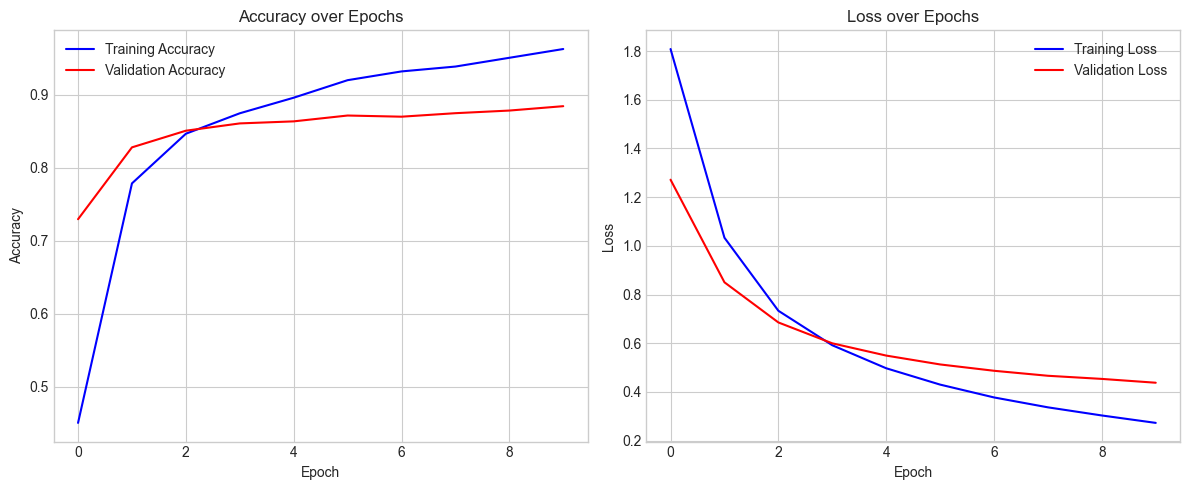

In [16]:
plot_history(efficientnet_model_history)